In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import array_to_latex
from qiskit_transpiler import get_pm
from qiskit import IBMQ
from qiskit.tools import job_monitor
from qiskit import transpile as transpile_qiskit
import qiskit

In [2]:
with open('../ibm_API_key','r') as file:
    token = file.readline()

provider = IBMQ.enable_account(token, hub='ibm-q-ncsu', group='nc-state', project='quantum-compiler')

MissingOptionalLibraryError: "The 'qiskit-ibmq-provider' library is required to use 'IBMQ provider'. You can install it with 'pip install qiskit-ibmq-provider'."

In [16]:
print( qiskit.__version__)

0.45.0


In [3]:
def make_circuit(noise_factor):
    q = 0
    t = 0.8765
    params = [0.0343,0.73443]
    circ = QuantumCircuit(1)
    circ.h(q)
    for _ in range(noise_factor):
        circ.rz(-params[1], q)
        circ.rx(2 * params[0] * t, q)
        circ.rz(params[1], q)
        circ.rz(-params[1], q)
        circ.rx(-2 * params[0] * t, q)
        circ.rz(params[1], q)
    circ.rz(-params[1], q)
    circ.rx(2 * params[0] * t, q)
    circ.rz(params[1], q)
    circ.h(q)
    return circ

def execute_and_get_statevector(circ):
    backend = provider.get_backend('ibmq_kolkata')
    return execute(circ,backend).result().get_counts()

backend = provider.get_backend('ibm_auckland')
pm = get_pm(backend)

C:\Users\Admin\.conda\envs\simuq\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


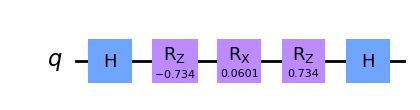

In [4]:
circ0 = make_circuit(0)
circ0.draw('mpl')

C:\Users\Admin\.conda\envs\simuq\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


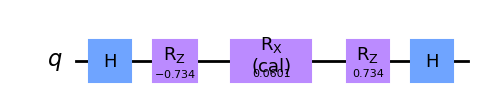

In [5]:
circ0_pm = pm.run(circ0)
circ0_pm.draw('mpl')

C:\Users\Admin\.conda\envs\simuq\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


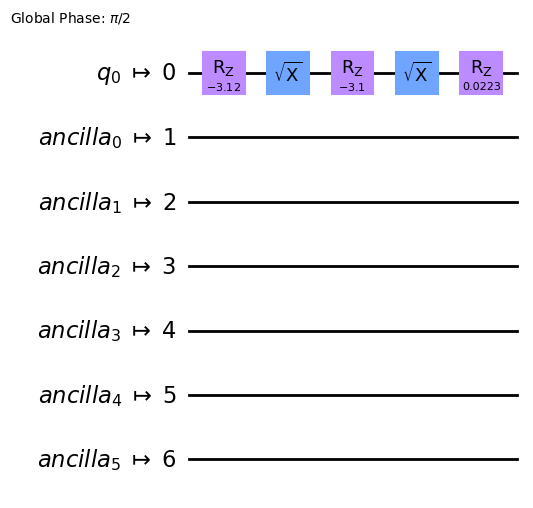

In [8]:
backend = provider.get_backend('ibm_nairobi')
circ0_transpiled = transpile_qiskit(circ0_pm, backend=backend)
circ0_transpiled.draw('mpl')

In [9]:
job = execute(circ0_transpiled,backend=backend, shots=1024)
job_monitor(job)
results = job.result()

QpyError: "Object type '<class 'qiskit.pulse.schedule.Schedule'>' is not supported in Program namespace."

In [ ]:
plot_histogram(results.get_counts())